In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()

In [113]:
# open data
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [114]:
df.shape[0]

1304

In [112]:
df = df[
    (df['value'] >= (df['value'].quantile(0.025))) & 
    (df['value'] <= (df['value'].quantile(0.975)))   
    ]
df.shape[0]

1238

In [115]:
# clean data
df = df[
    (df['value'] <= (df['value'].quantile(0.975))) &
    (df['value'] >= (df['value'].quantile(0.025)))]
df.shape[0]

1238

In [23]:
df.index = pd.to_datetime(df.index)
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


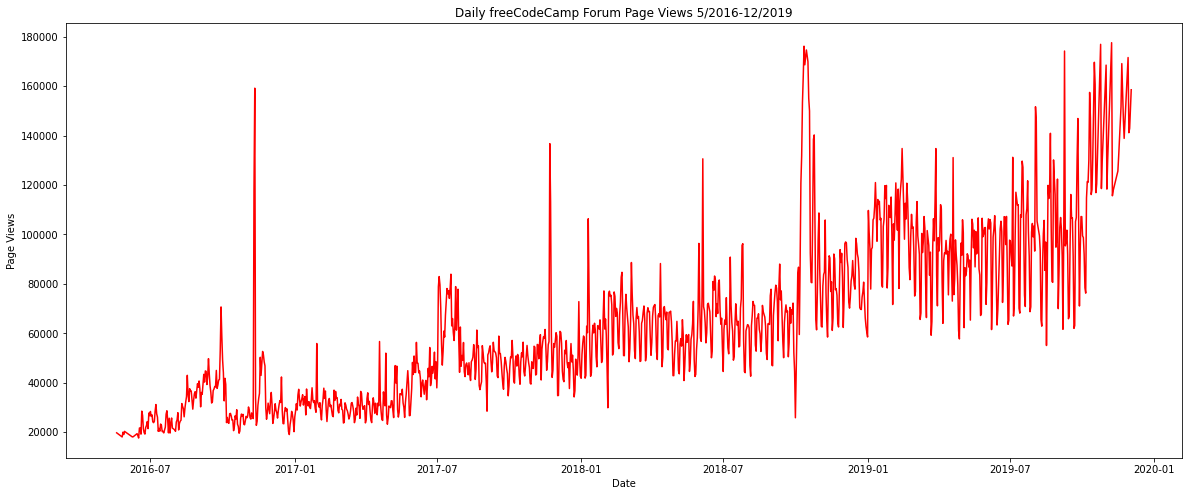

In [24]:
# Draw Line Plot
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df.index, df['value'], color='r')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

In [52]:
# copy then modify data
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar.head()

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [70]:
grouped_df = df_bar.groupby([df.index.year, df.index.month])['value'].agg(np.mean).rename_axis(['year', 'month'])
grouped_df = grouped_df.reset_index()
grouped_df.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21662.750000
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


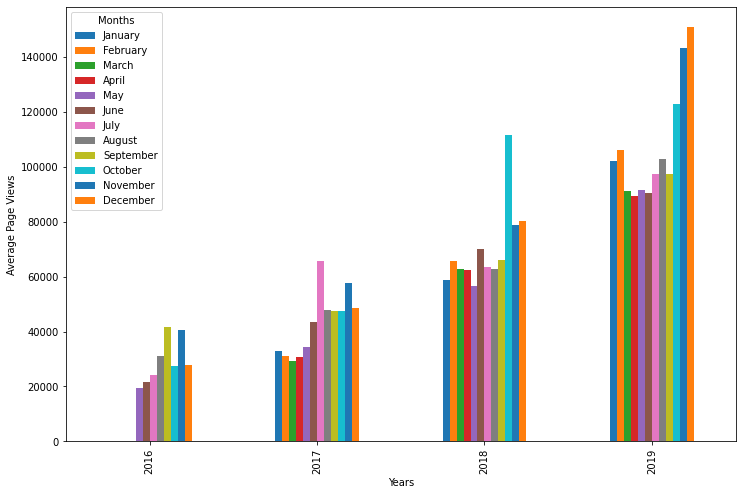

In [88]:
df_bar = pd.pivot_table(grouped_df, values='value', index='year', columns='month')
ax = df_bar.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12, 8)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')
plt.show()

In [92]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


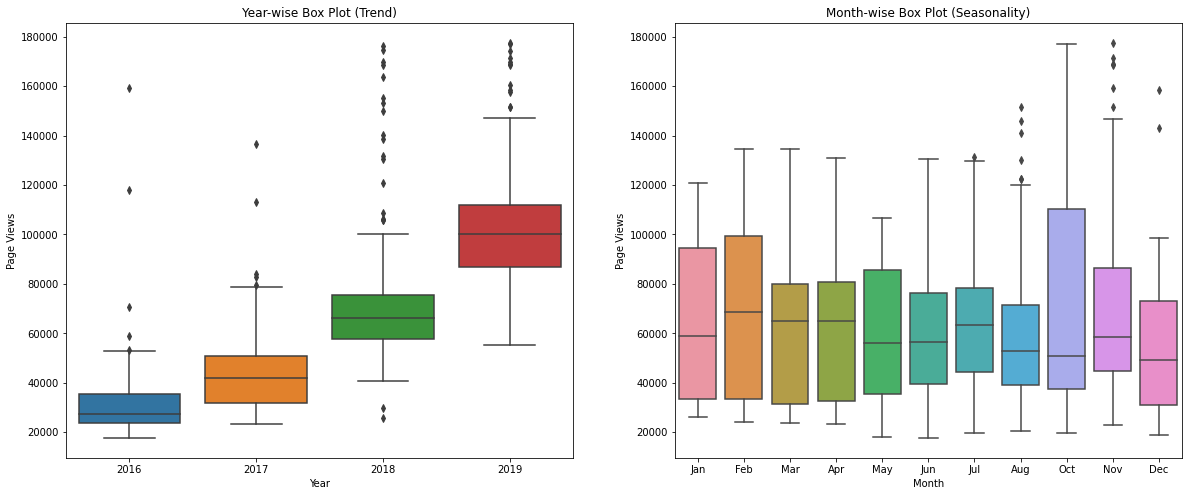

In [105]:
fig, ax = plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.boxplot(x="year", y="value", data=df_box)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title('Year-wise Box Plot (Trend)')

plt.subplot(1,2,2)
ax = sns.boxplot(x="month", y="value", data=df_box, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Seasonality)')
plt.show()